Iteration 0, Global Best Value: 12.480143562940606
Iteration 10, Global Best Value: 0.1506289363176876
Iteration 20, Global Best Value: 0.00112916703358934
Iteration 30, Global Best Value: 1.4744535405952774e-06
Iteration 40, Global Best Value: 3.111335900030099e-08
Iteration 50, Global Best Value: 4.915072793210129e-10
Iteration 60, Global Best Value: 3.597477871153387e-11
Iteration 70, Global Best Value: 7.105427357601002e-15
Iteration 80, Global Best Value: 0.0
Iteration 90, Global Best Value: 0.0

Final Global Best Position: [-4.77154038e-10 -1.46929640e-09]
Final Global Best Value: 0.0


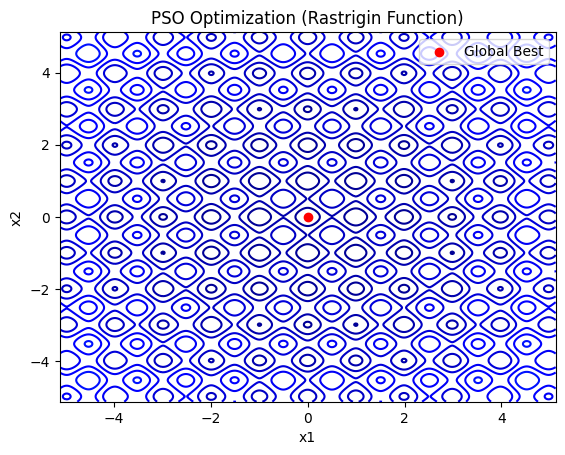

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function (Rastrigin function as an example)
def rastrigin(x):
    A = 10
    return A * len(x) + sum(x_i**2 - A * np.cos(2 * np.pi * x_i) for x_i in x)

# PSO Parameters
n_particles = 30     # Number of particles
n_dimensions = 2     # Number of dimensions (parameters to optimize)
n_iterations = 100   # Number of iterations

w = 0.5              # Inertia weight
c1 = 1.5             # Cognitive coefficient (particle's own best position)
c2 = 1.5             # Social coefficient (global best position)
v_max = 2.0          # Maximum velocity

# Initialize particles' positions and velocities
positions = np.random.uniform(-5.12, 5.12, (n_particles, n_dimensions))
velocities = np.random.uniform(-1, 1, (n_particles, n_dimensions))

# Initialize personal best positions and global best position
pbest_positions = positions.copy()
pbest_values = np.apply_along_axis(rastrigin, 1, pbest_positions)

gbest_position = pbest_positions[np.argmin(pbest_values)]
gbest_value = np.min(pbest_values)

# PSO Main Loop
for t in range(n_iterations):
    # Evaluate fitness
    fitness_values = np.apply_along_axis(rastrigin, 1, positions)

    # Update personal bests
    for i in range(n_particles):
        if fitness_values[i] < pbest_values[i]:
            pbest_positions[i] = positions[i]
            pbest_values[i] = fitness_values[i]

    # Update global best
    min_fitness_idx = np.argmin(pbest_values)
    if pbest_values[min_fitness_idx] < gbest_value:
        gbest_position = pbest_positions[min_fitness_idx]
        gbest_value = pbest_values[min_fitness_idx]

    # Update velocity and position for each particle
    r1 = np.random.rand(n_particles, n_dimensions)
    r2 = np.random.rand(n_particles, n_dimensions)

    velocities = (w * velocities +
                  c1 * r1 * (pbest_positions - positions) +
                  c2 * r2 * (gbest_position - positions))

    # Apply velocity limits (optional)
    velocities = np.clip(velocities, -v_max, v_max)

    # Update positions
    positions = positions + velocities

    # Print the current best solution
    if t % 10 == 0:  # Print every 10 iterations
        print(f"Iteration {t}, Global Best Value: {gbest_value}")

# Final output
print(f"\nFinal Global Best Position: {gbest_position}")
print(f"Final Global Best Value: {gbest_value}")

# Plotting the optimization process (visualization for 2D case)
x_vals = np.linspace(-5.12, 5.12, 400)
y_vals = np.linspace(-5.12, 5.12, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rastrigin([X, Y])

plt.contour(X, Y, Z, levels=np.linspace(0, 500, 50), cmap='jet')
plt.scatter(gbest_position[0], gbest_position[1], color='red', label='Global Best')
plt.title("PSO Optimization (Rastrigin Function)")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()
